In [1]:
import numpy as np
import matplotlib.pyplot as plt

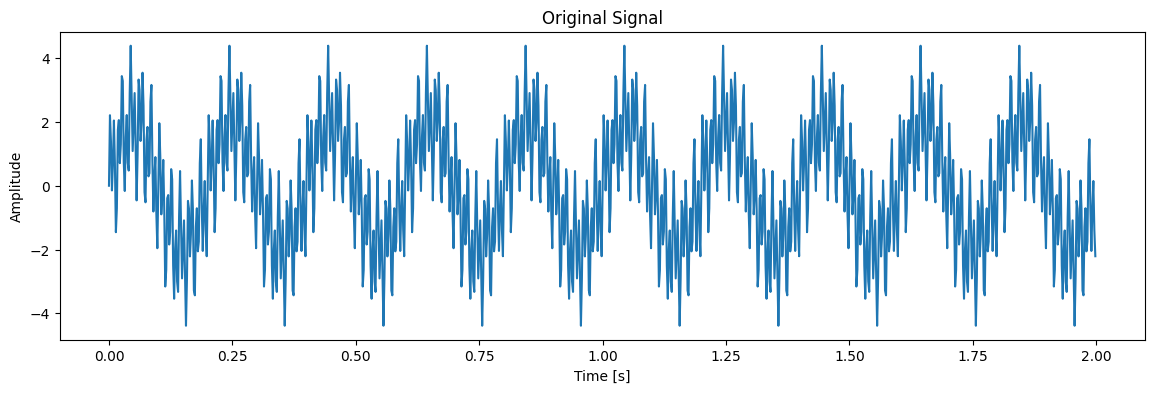

In [19]:
# Time parameters
fs = 500  # Sampling frequency (samples per second)
t_end = 2  # Duration in seconds
t = np.linspace(0, t_end, int(fs * t_end), endpoint=False)

# Frequencies of the sine waves
freq1 = 5    # Frequency of first sine wave (Hz)
freq2 = 50   # Frequency of second sine wave (Hz)
freq3 = 120  # Frequency of third sine wave (Hz)

# Generate the original signal
signal = 2 * np.sin(2 * np.pi * freq1 * t) + \
         1.0 * np.sin(2 * np.pi * freq2 * t) + \
         1.5 * np.sin(2 * np.pi * freq3 * t)

# Plot the original signal
plt.figure(figsize=(14, 4))
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

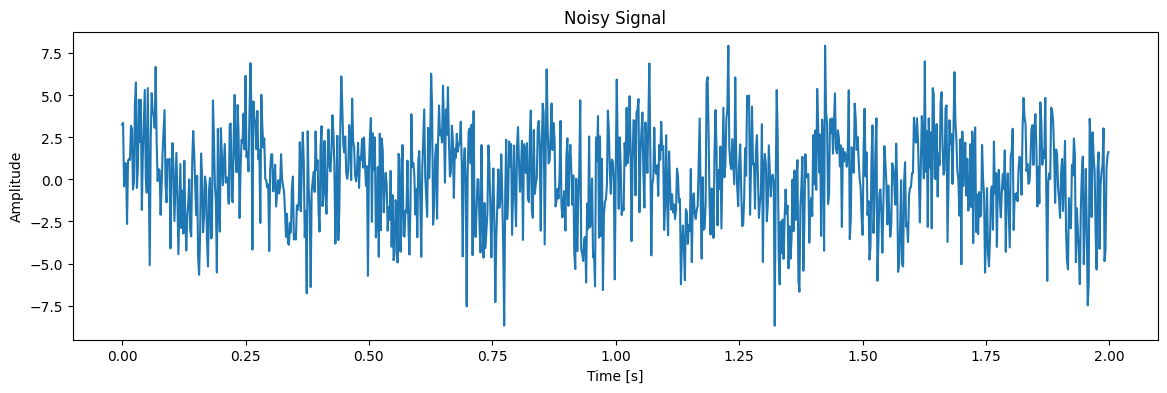

In [20]:
# Add Gaussian noise
noise = np.random.normal(0, 2, signal.shape)
noisy_signal = signal + noise

# Plot the noisy signal
plt.figure(figsize=(14, 4))
plt.plot(t, noisy_signal)
plt.title('Noisy Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

In [40]:
freq_domain = np.fft.fft(noisy_signal)
freqs = np.fft.fftfreq(len(noisy_signal), d=1/fs)

In [54]:
def denoise_signal(noisy_signal, cutoff_abs):
    freq_domain = np.fft.fft(noisy_signal)
    mask = np.abs(freq_domain) > cutoff_abs
    filtered_freq_domain = freq_domain * mask
    denoised_signal = np.fft.ifft(filtered_freq_domain).real
    estimated_noise = noisy_signal - denoised_signal

    return denoised_signal, estimated_noise

In [56]:
denoised_signal, estimated_noise = denoise_signal(noisy_signal, 200)

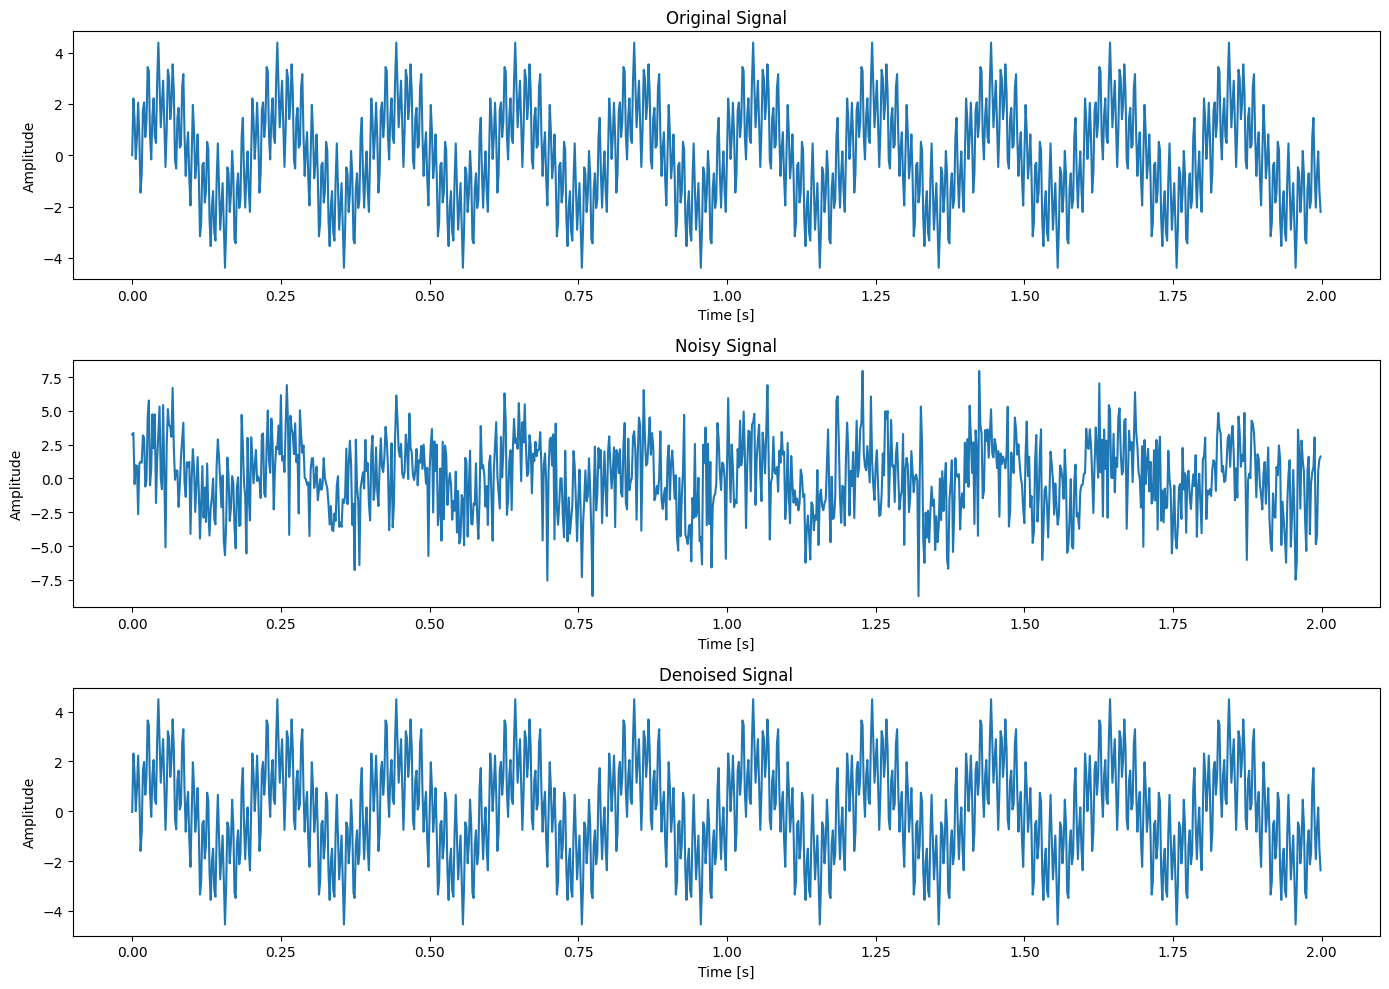

In [58]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal)
plt.title('Noisy Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t, denoised_signal)
plt.title('Denoised Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

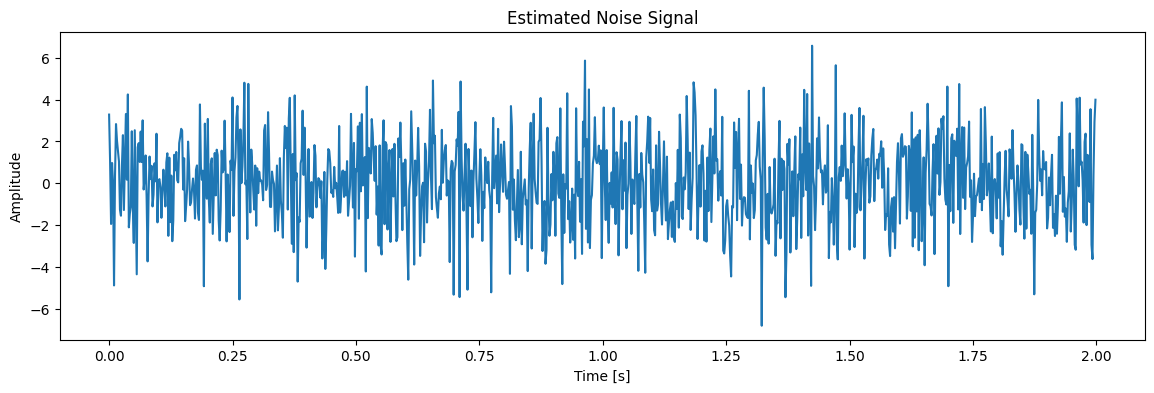

In [59]:
# Plot the estimated noise
plt.figure(figsize=(14, 4))
plt.plot(t, estimated_noise)
plt.title('Estimated Noise Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

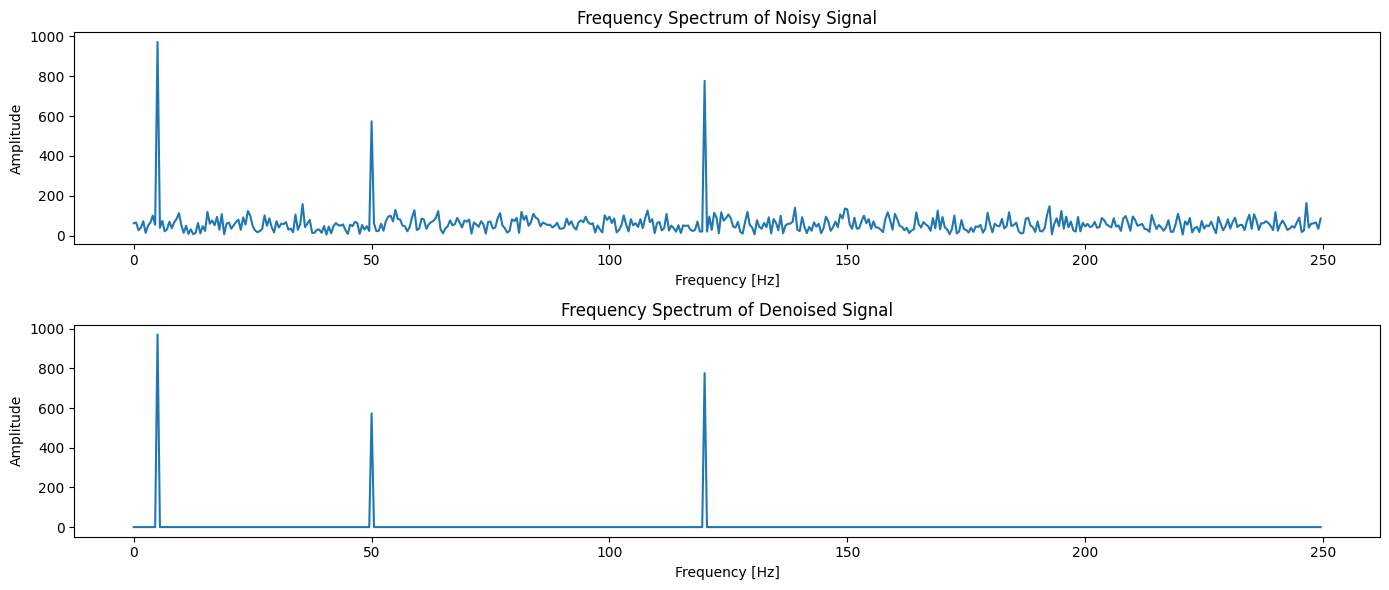

In [60]:
# Compute frequency spectra
freqs = np.fft.fftfreq(len(noisy_signal), d=1/fs)
fft_noisy = np.fft.fft(noisy_signal)
fft_denoised = np.fft.fft(denoised_signal)

# Only take the positive half of the spectrum
mask = freqs >= 0
freqs = freqs[mask]
fft_noisy = np.abs(fft_noisy)[mask]
fft_denoised = np.abs(fft_denoised)[mask]

# Plot the spectra
plt.figure(figsize=(14, 6))
plt.subplot(2,1,1)
plt.plot(freqs, fft_noisy)
plt.title('Frequency Spectrum of Noisy Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.subplot(2,1,2)
plt.plot(freqs, fft_denoised)
plt.title('Frequency Spectrum of Denoised Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [70]:
# Load the AirPassengers dataset from statsmodels
data = pd.read_csv("AirPassengers.csv")

# Parse dates
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

data.columns = ['AirPassengers']

# View the data
data.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


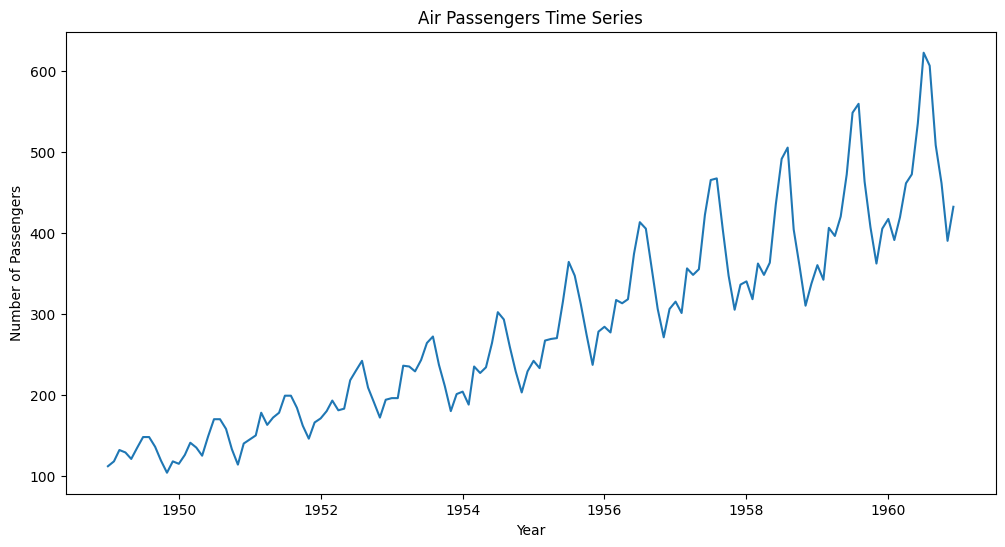

In [71]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['AirPassengers'])
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

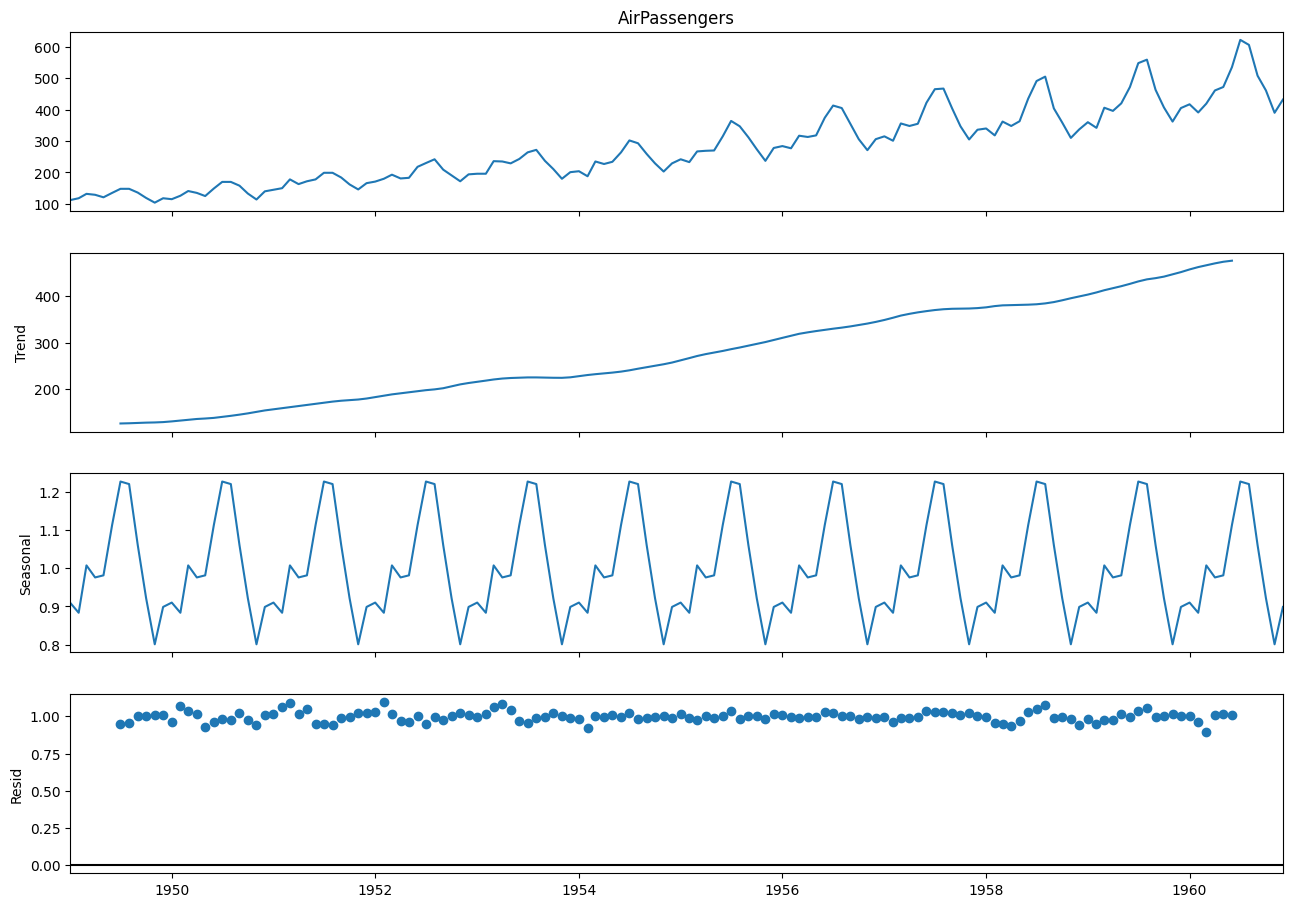

In [72]:
# Decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['AirPassengers'], model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

In [74]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    result = adfuller(timeseries)
    labels = ['Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result[:4],labels):
        print(f'{label} : {value}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0), reject the null hypothesis. The data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

adf_test(data['AirPassengers'])

Results of Augmented Dickey-Fuller Test:
Test Statistic : 0.8153688792060498
p-value : 0.991880243437641
#Lags Used : 13
Number of Observations Used : 130
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


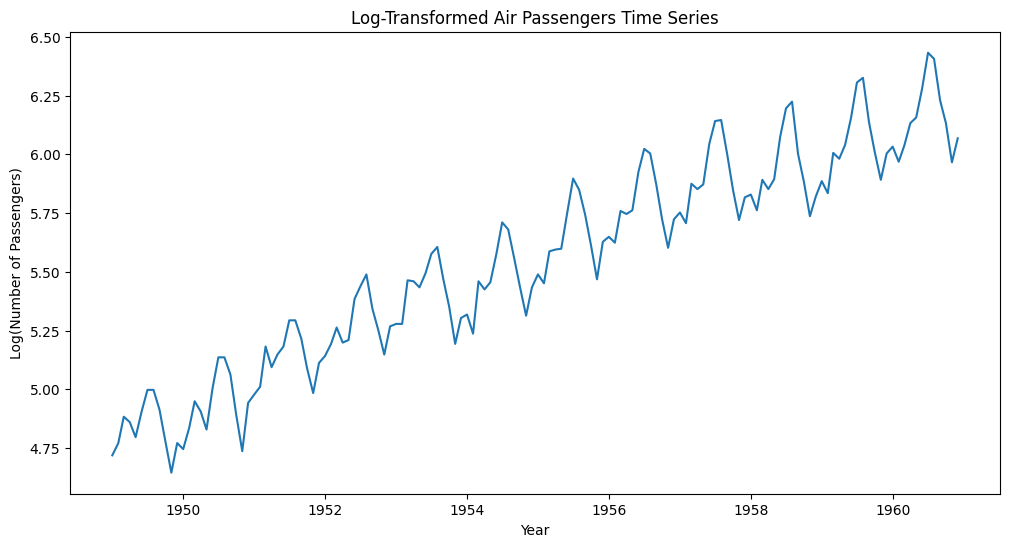

In [75]:
data['LogPassengers'] = np.log(data['AirPassengers'])

# Plot the log-transformed data
plt.figure(figsize=(12,6))
plt.plot(data.index, data['LogPassengers'])
plt.title('Log-Transformed Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Log(Number of Passengers)')
plt.show()

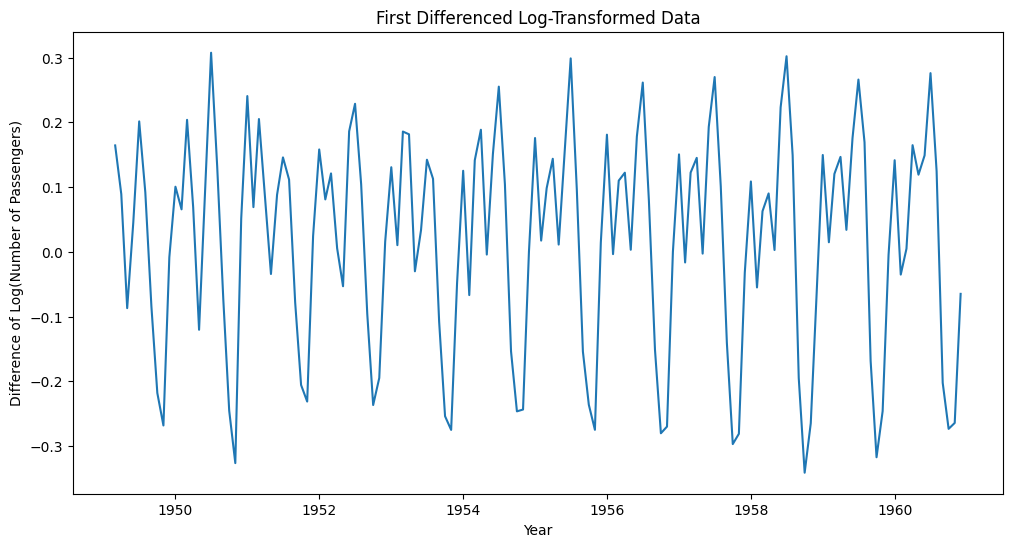

In [78]:
# Take the first difference
data['LogPassengers_diff'] = data['LogPassengers'] - data['LogPassengers'].shift(2)

# Drop NaN values
data_diff = data['LogPassengers_diff'].dropna()

# Plot the differenced data
plt.figure(figsize=(12,6))
plt.plot(data_diff)
plt.title('First Differenced Log-Transformed Data')
plt.xlabel('Year')
plt.ylabel('Difference of Log(Number of Passengers)')
plt.show()

In [79]:
adf_test(data_diff)

Results of Augmented Dickey-Fuller Test:
Test Statistic : -3.1679073752887317
p-value : 0.021919114564039603
#Lags Used : 11
Number of Observations Used : 130
Strong evidence against the null hypothesis(H0), reject the null hypothesis. The data has no unit root and is stationary.


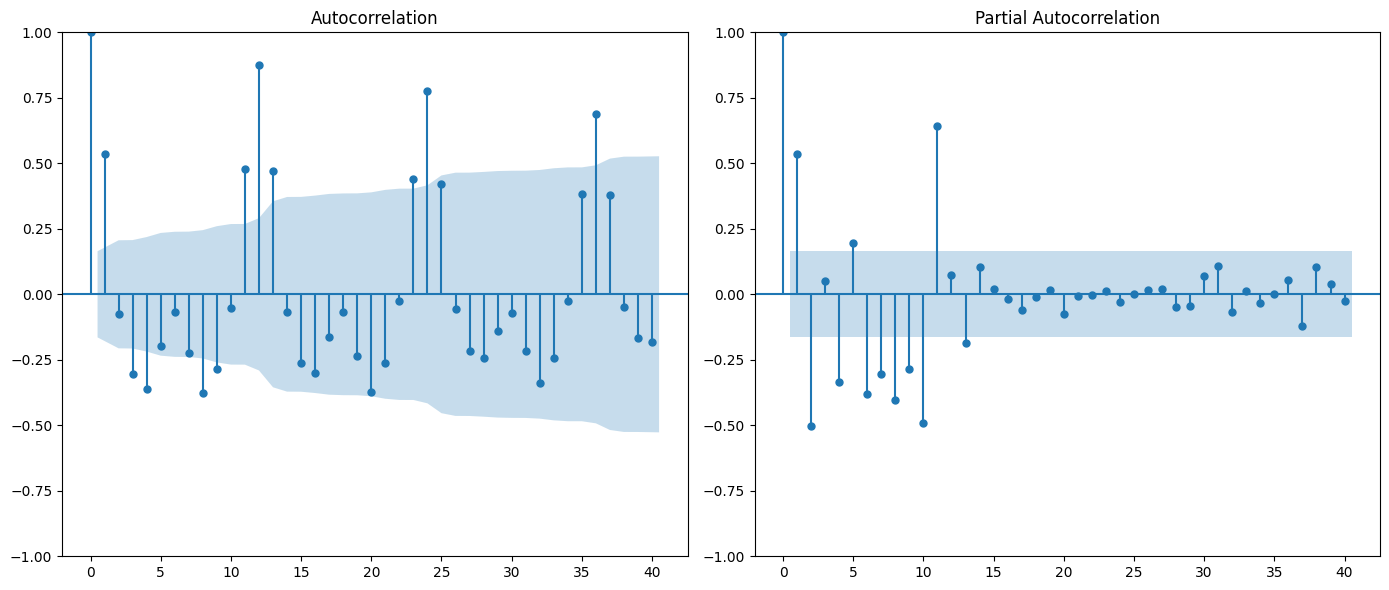

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(14,6))
plt.subplot(121)
plot_acf(data_diff, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(data_diff, lags=40, ax=plt.gca())
plt.tight_layout()
plt.show()

In [83]:
import statsmodels

In [96]:
model = statsmodels.tsa.arima.model.ARIMA(data['LogPassengers'],
                                  order=(12, 2, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:          LogPassengers   No. Observations:                  144
Model:               ARIMA(12, 2, 12)   Log Likelihood                 262.985
Date:                Mon, 09 Dec 2024   AIC                           -475.969
Time:                        23:54:17   BIC                           -404.474
Sample:                    01-01-1949   HQIC                          -446.919
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2836      0.128    -10.031      0.000      -1.534      -1.033
ar.L2         -1.3570      0.119    -11.418      0.000      -1.590      -1.124
ar.L3         -1.2915      0.128    -10.082      0.0

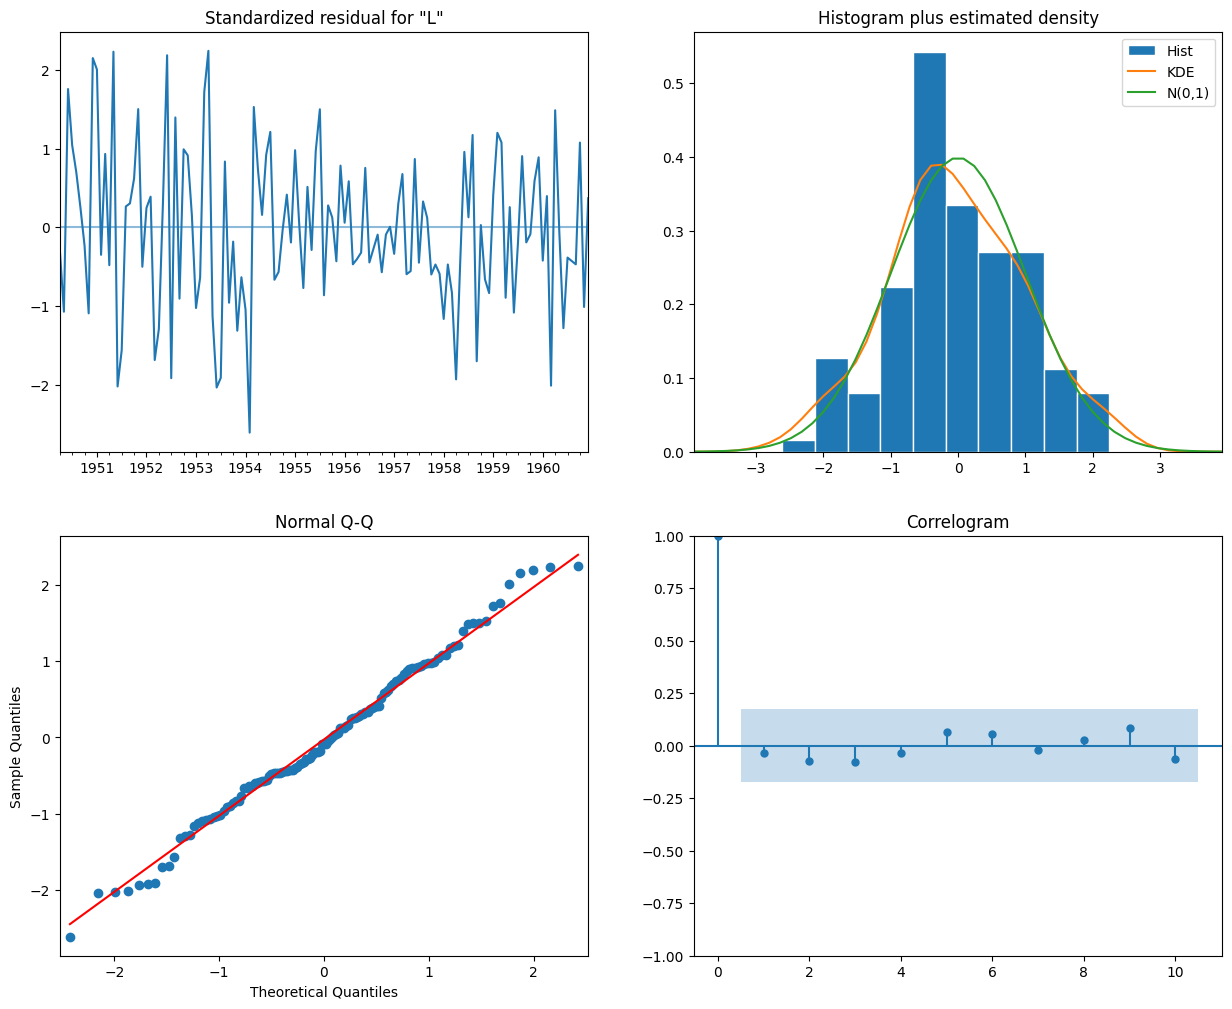

In [92]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

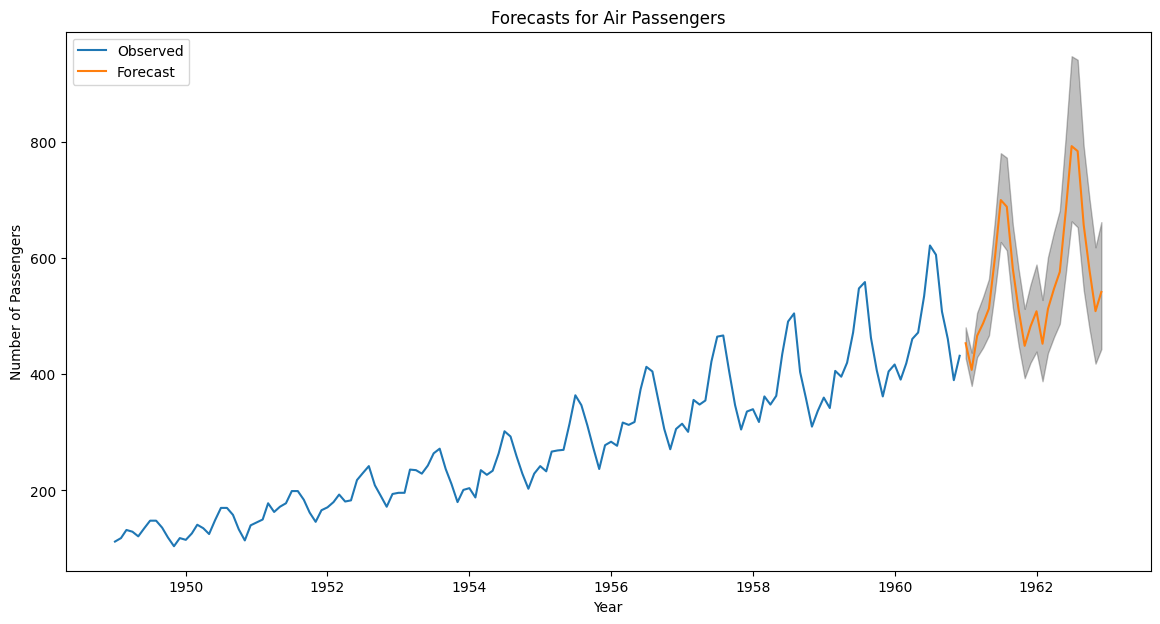

In [97]:
# Forecast for the next 24 months
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()

# Convert predictions back to original scale
predicted_mean = np.exp(pred_uc.predicted_mean)
pred_ci_exp = np.exp(pred_ci)

# Plot the observed data and forecasts
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['AirPassengers'], label='Observed')
plt.plot(predicted_mean.index, predicted_mean, label='Forecast')
plt.fill_between(pred_ci_exp.index, pred_ci_exp.iloc[:, 0], pred_ci_exp.iloc[:, 1], color='k', alpha=.25)
plt.legend()
plt.title('Forecasts for Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()